In [1]:
import pycaret
pycaret.__version__

'3.1.0'

In [2]:
import pandas as pd
data = pd.read_csv('summary_intergated.csv')
target = "Num_class_on_mixture"
target_col = data[target]
columns_to_convert = ['class', 'F_type', 'Rates'] 
for column in columns_to_convert:
    data[column] = data[column].astype('category')
data = data.drop(columns=data.filter(regex='^d_').columns)
data = data.drop(columns=data.filter(regex='_distance$').columns)
data = data.drop(columns=["Best", "Num_class", "Num_class_on_mixture", "If_mix"])
data = data.drop(columns=["Model", "Locus_name", "Type", "Model_string", "parameters"])
if not target in data.columns:
    print("add")
    data[target] = target_col
    
# options 1: One-hot encoding
data = pd.get_dummies(data, columns=columns_to_convert)
# options 2: Drop the catagory columns
# data = data.drop(columns=columns_to_convert)

data.to_csv('processed_data_for_lr.csv', index=False)

add


In [3]:
from pycaret.classification import *
s = setup(data, target = 'Num_class_on_mixture', session_id = 124, train_size=0.8)

,Description,Value
0,Session id,124
1,Target,Num_class_on_mixture
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4"
4,Original data shape,"(12909, 68)"
5,Transformed data shape,"(12909, 68)"
6,Transformed train set shape,"(10327, 68)"
7,Transformed test set shape,"(2582, 68)"
8,Numeric features,67
9,Preprocess,True


In [4]:
models = ['et', 'rf', 'gbc', 'ridge', 'lda', 'lr', 'knn', 'dummy', 'dt', 'svm', 'nb', 'ada', 'qda']
best = compare_models(include=models)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7405,0.7882,0.4077,0.5702,0.4501,0.4025,0.4214,1.3510
rf,Random Forest Classifier,0.7335,0.7879,0.3969,0.5525,0.4233,0.3844,0.4031,1.2040
gbc,Gradient Boosting Classifier,0.7117,0.7815,0.3825,0.4828,0.3976,0.3451,0.3585,6.4560
ridge,Ridge Classifier,0.7058,0.0000,0.3927,0.4355,0.3835,0.3372,0.3486,0.6380
lda,Linear Discriminant Analysis,0.7025,0.7764,0.4236,0.4724,0.4162,0.3556,0.3620,0.7770
lr,Logistic Regression,0.6978,0.7512,0.4272,0.4282,0.3959,0.3443,0.3516,2.6510
ada,Ada Boost Classifier,0.6908,0.5995,0.3866,0.4215,0.3719,0.3126,0.3219,0.5260
knn,K Neighbors Classifier,0.6746,0.6926,0.2941,0.3877,0.3229,0.2364,0.2517,0.1310
svm,SVM - Linear Kernel,0.6710,0.0000,0.2840,0.3126,0.2493,0.1871,0.2148,1.0190
dummy,Dummy Classifier,0.6590,0.5000,0.0659,0.0435,0.0524,0.0000,0.0000,0.0460


In [5]:
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import ExtraTreesRegressor
# from sklearn.impute import SimpleImputer

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['squared_error', 'poisson', 'absolute_error', 'friedman_mse']
# }

# X = data.drop(columns=[target])
# y = data[target]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124)

# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy='mean')

# X_train_imputed = imputer.fit_transform(X_train)
# X_test_imputed = imputer.transform(X_test)

# ETR = ExtraTreesRegressor(random_state=124).fit(X_train_imputed, y_train)
# GSCV = GridSearchCV(estimator=ETR, param_grid=param_grid, cv=5, error_score='raise')

# try:
#     GSCV.fit(X_train_imputed, y_train)
# except ValueError as e:
#     print("An error occurred during the fit:", e)

# from sklearn.metrics import mean_squared_error
# print(GSCV.best_params_)
# print(GSCV.best_estimator_)

# y_pred = GSCV.predict(X_test_imputed)

# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error: ", mse)

# import matplotlib.pyplot as plt
# import numpy as np

# plt.figure()
# plt.scatter(y_test, y_pred, alpha=0.5)
# m, b = np.polyfit(y_test, y_pred, 1)
# plt.plot(y_test, m*y_test + b, color='red')
# plt.title('Predict vs True value')
# plt.xlabel('True value')
# plt.ylabel('Predict value')
# plt.show()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7348,0.7632,0.7348,0.6987,0.6951,0.3785,0.4021
1,0.7590,0.8068,0.3864,0.6155,0.4517,0.4395,0.4635
2,0.7270,0.7734,0.3381,0.4950,0.3856,0.3724,0.3889
3,0.7425,0.7734,0.3977,0.6056,0.4538,0.4106,0.4274
4,0.7435,0.7910,0.3864,0.5476,0.4335,0.4141,0.4307
5,0.7348,0.8013,0.3778,0.5663,0.4266,0.3938,0.4097
6,0.7367,0.7905,0.3598,0.5431,0.4001,0.3942,0.4128
7,0.7490,0.7949,0.3608,0.5687,0.4220,0.4163,0.4394
8,0.7393,0.7929,0.3807,0.5265,0.4193,0.4081,0.4229


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7144,0.7608,0.7144,0.6275,0.6648,0.3283,0.3490
1,0.7386,0.7951,0.3523,0.3982,0.3738,0.3907,0.4122
2,0.7047,0.7813,0.3239,0.3321,0.3279,0.3260,0.3389
3,0.7241,0.7699,0.3750,0.5059,0.3793,0.3741,0.3875
4,0.7193,0.7891,0.3608,0.5040,0.3710,0.3583,0.3728
5,0.7280,0.7919,0.3835,0.3804,0.3820,0.3836,0.3973
6,0.7067,0.7714,0.3343,0.3442,0.3392,0.3317,0.3450
7,0.7297,0.7876,0.3494,0.5220,0.3725,0.3725,0.3918
8,0.7258,0.7932,0.3807,0.3599,0.3700,0.3874,0.3986


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


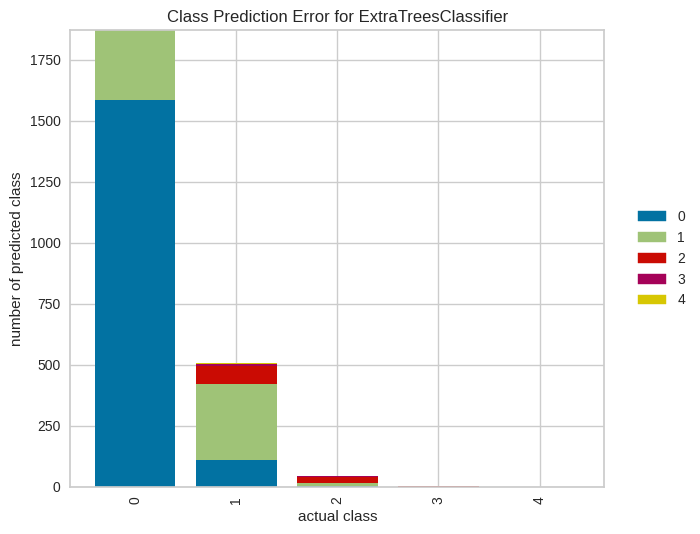

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=124, verbose=0, warm_start=False)


In [6]:
# create et model
et = create_model('et')
# hyperparameter tuning
tuned_et = tune_model(et, n_iter=100, optimize='Recall')
# print the best model
plot_model(tuned_et, plot = 'error')
print(tuned_et)

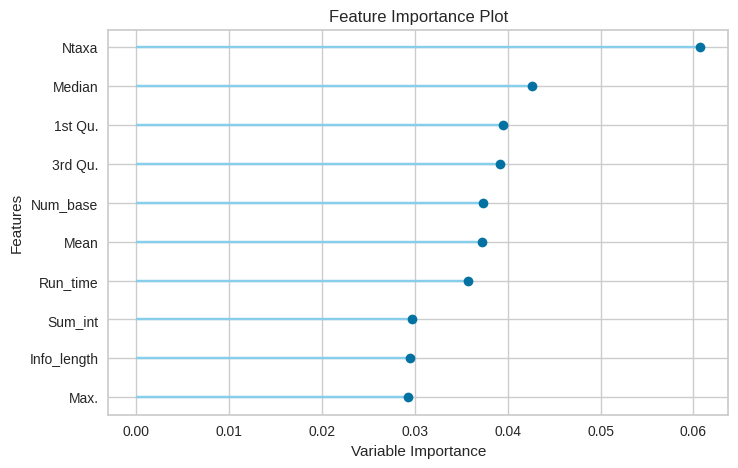

In [7]:
plot_model(tuned_et, plot = 'feature',)

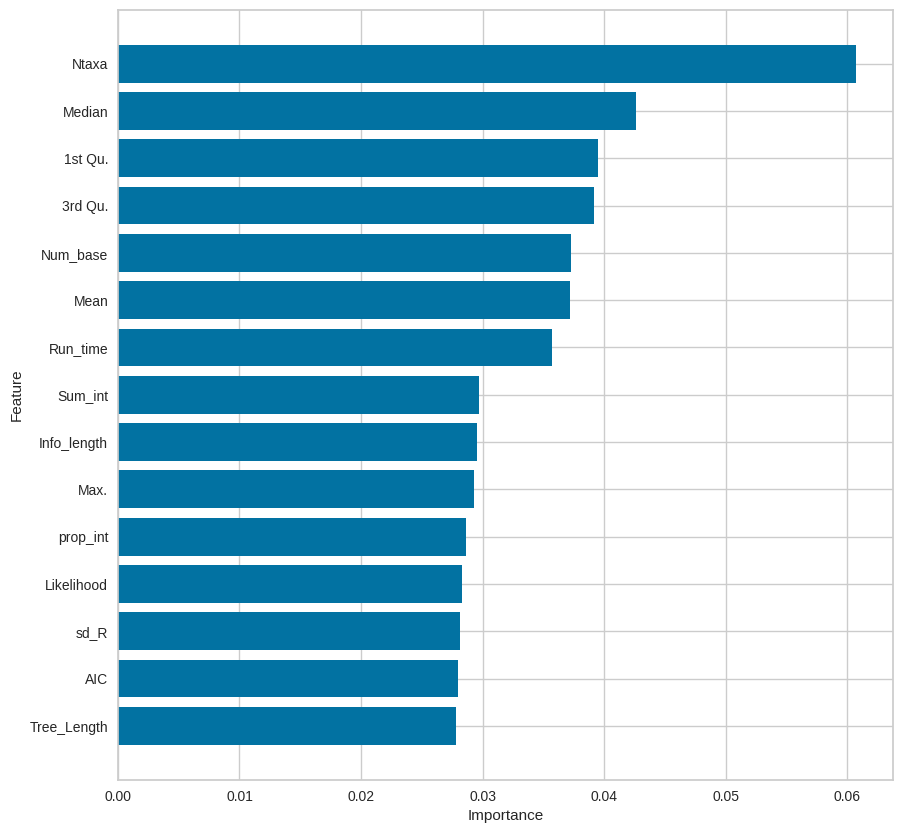

In [8]:
# get feature importance
importance = tuned_et.feature_importances_

# get feature names
features = get_config('X_train').columns

# create a dataframe
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})

# sort the dataframe by importance score and select top 15
importance_df = importance_df.sort_values(by='Importance', ascending=True).tail(15)

# plot using matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.barh(y=importance_df['Feature'], width=importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


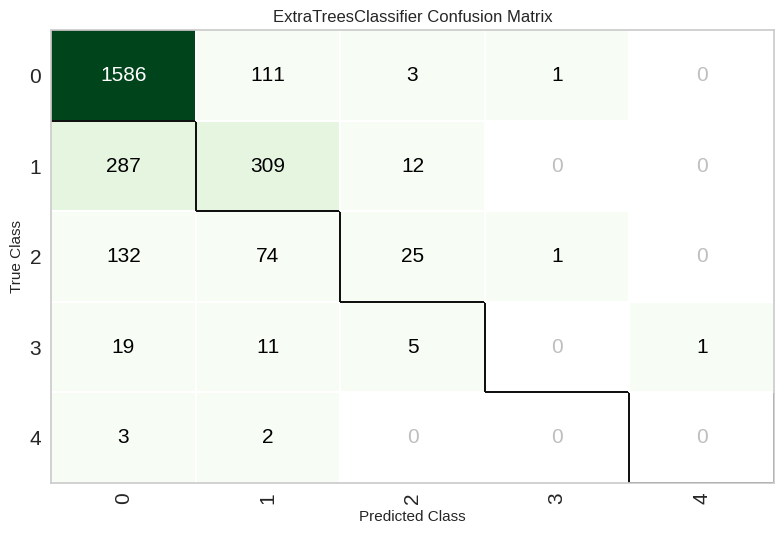

In [9]:
# Plot normalized confusion matrix
plot_model(tuned_et, plot = 'confusion_matrix')

In [10]:
import pandas as pd
data = pd.read_csv('summary_intergated.csv')
target = "If_mix"
target_col = data[target]
columns_to_convert = ['class', 'F_type', 'Rates'] 
for column in columns_to_convert:
    data[column] = data[column].astype('category')
data = data.drop(columns=data.filter(regex='^d_').columns)
data = data.drop(columns=data.filter(regex='_distance$').columns)
data = data.drop(columns=["Best", "Num_class", "Num_class_on_mixture", "If_mix"])
data = data.drop(columns=["Model", "Locus_name", "Type", "Model_string", "parameters"])
if not target in data.columns:
    print("add")
    data[target] = target_col
    
# options 1: One-hot encoding
data = pd.get_dummies(data, columns=columns_to_convert)
# options 2: Drop the catagory columns
# data = data.drop(columns=columns_to_convert)

data.to_csv('processed_data_for_lr.csv', index=False)

add


In [11]:
from pycaret.classification import *
s2 = setup(data, target = 'If_mix', session_id = 124, train_size=0.8)

,Description,Value
0,Session id,124
1,Target,If_mix
2,Target type,Binary
3,Original data shape,"(12909, 68)"
4,Transformed data shape,"(12909, 68)"
5,Transformed train set shape,"(10327, 68)"
6,Transformed test set shape,"(2582, 68)"
7,Numeric features,67
8,Preprocess,True
9,Imputation type,simple


In [12]:
models = ['et', 'rf', 'gbc', 'ridge', 'lda', 'lr', 'knn', 'dummy', 'dt', 'svm', 'nb', 'ada', 'qda']
best = compare_models(include=models)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7869,0.8079,0.5653,0.7486,0.6438,0.4960,0.5062,0.3910
rf,Random Forest Classifier,0.7860,0.8061,0.5738,0.7407,0.6463,0.4965,0.5050,0.4790
gbc,Gradient Boosting Classifier,0.7636,0.7950,0.5642,0.6873,0.6192,0.4503,0.4552,1.4120
lda,Linear Discriminant Analysis,0.7623,0.7933,0.5766,0.6787,0.6232,0.4513,0.4547,0.1620
ridge,Ridge Classifier,0.7595,0.0000,0.5761,0.6724,0.6202,0.4458,0.4489,0.0770
lr,Logistic Regression,0.7543,0.7704,0.5911,0.6552,0.6212,0.4402,0.4417,0.3290
ada,Ada Boost Classifier,0.7525,0.7825,0.5443,0.6695,0.5998,0.4235,0.4287,0.4920
knn,K Neighbors Classifier,0.7148,0.7149,0.4889,0.6012,0.5388,0.3357,0.3397,0.1280
dt,Decision Tree Classifier,0.6944,0.6635,0.5664,0.5509,0.5583,0.3248,0.3251,0.1520
dummy,Dummy Classifier,0.6590,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0640


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8006,0.8186,0.5767,0.7808,0.6634,0.5262,0.5384
1,0.7648,0.7794,0.5256,0.7088,0.6036,0.4415,0.4515
2,0.7870,0.8215,0.5909,0.7324,0.6541,0.5028,0.5088
3,0.7967,0.8159,0.5653,0.7773,0.6546,0.5156,0.5287
4,0.7686,0.7951,0.5341,0.7148,0.6114,0.4515,0.4613
5,0.7899,0.8207,0.5949,0.7394,0.6593,0.5100,0.5164
6,0.7928,0.8090,0.5864,0.7527,0.6592,0.5137,0.5220
7,0.7975,0.8073,0.5597,0.7849,0.6534,0.5160,0.5307
8,0.7946,0.8260,0.5966,0.7500,0.6646,0.5193,0.5263


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7812,0.7998,0.5682,0.7299,0.6390,0.4855,0.4933
1,0.7551,0.7858,0.5227,0.6840,0.5926,0.4219,0.4297
2,0.7667,0.8089,0.5767,0.6881,0.6275,0.4596,0.4634
3,0.7832,0.8016,0.5682,0.7353,0.6410,0.4893,0.4977
4,0.7561,0.7814,0.5540,0.6724,0.6075,0.4329,0.4372
5,0.7754,0.8140,0.5807,0.7093,0.6386,0.4780,0.4831
6,0.7735,0.7908,0.5722,0.7088,0.6332,0.4720,0.4777
7,0.7800,0.7929,0.5767,0.7224,0.6414,0.4856,0.4920
8,0.7800,0.8218,0.5994,0.7104,0.6502,0.4915,0.4953


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


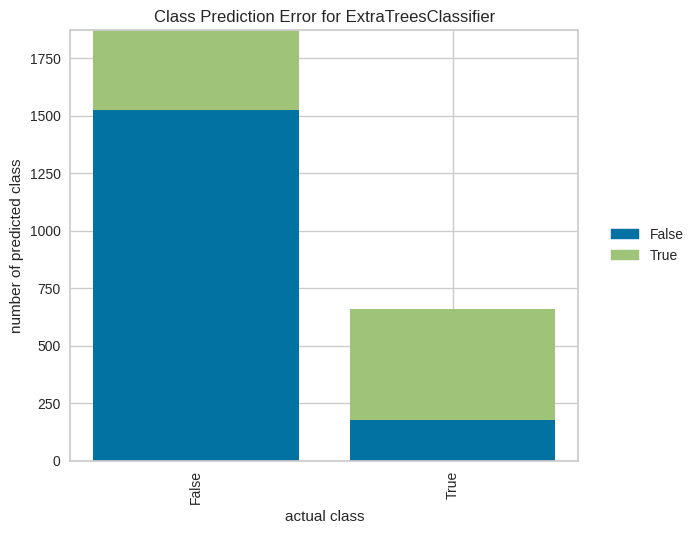

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=124, verbose=0, warm_start=False)


In [23]:
# create et model
et = create_model('et')
# hyperparameter tuning
tuned_et = tune_model(et, n_iter=10, optimize='Kappa')
# print the best model
plot_model(tuned_et, plot = 'error')
print(tuned_et)

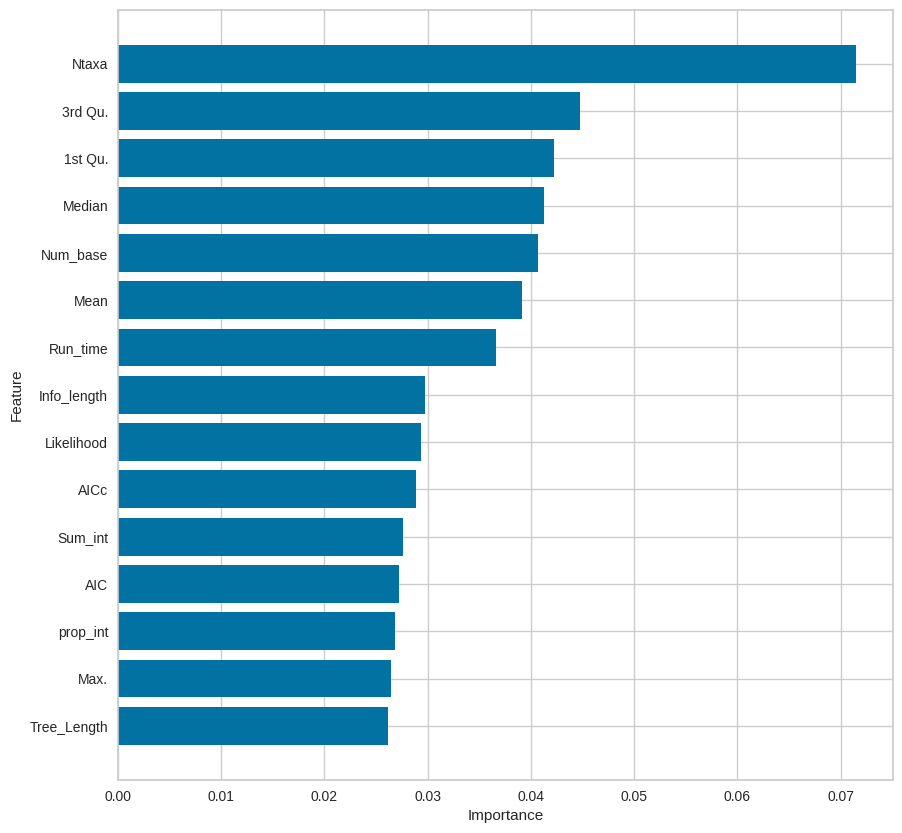

In [24]:
# get feature importance
importance = tuned_et.feature_importances_

# get feature names
features = get_config('X_train').columns

# create a dataframe
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})

# sort the dataframe by importance score and select top 15
importance_df = importance_df.sort_values(by='Importance', ascending=True).tail(15)

# plot using matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.barh(y=importance_df['Feature'], width=importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


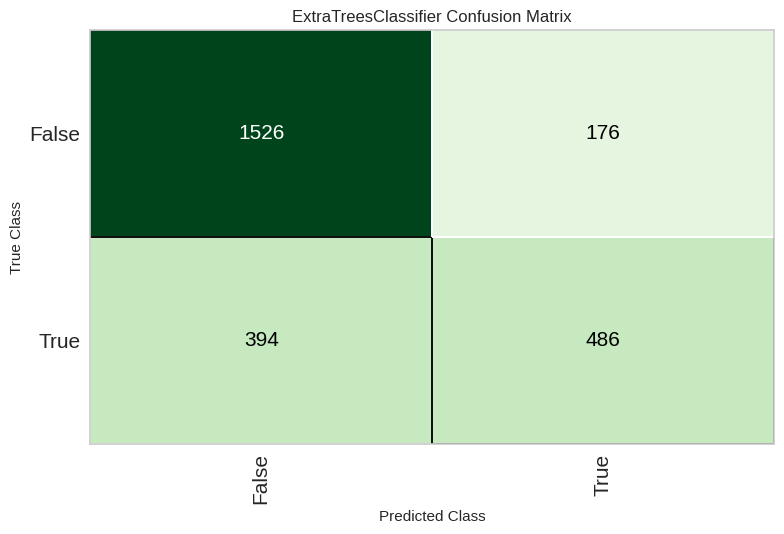

In [26]:
# Plot normalized confusion matrix
plot_model(best, plot = 'confusion_matrix')